In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import datetime

from scipy.stats           import chi2_contingency
from sklearn.model_selection import train_test_split

# from sklearn.ensemble      import RandomForestRegressor

# from sklearn.metrics       import mean_absolute_error, mean_squared_error
# from sklearn.linear_model  import LinearRegression, Lasso
# from sklearn.ensemble      import RandomForestRegressor


import random
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
aep = pd.read_csv( './AEP_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
comed = pd.read_csv( './COMED_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
dayton = pd.read_csv( './DAYTON_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
deok = pd.read_csv( './DEOK_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
dom = pd.read_csv( './DOM_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
duq = pd.read_csv( './DUQ_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ekpc = pd.read_csv( './EKPC_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
fe = pd.read_csv( './FE_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
ni = pd.read_csv( './NI_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjm = pd.read_csv( './PJM_Load_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjme = pd.read_csv( './PJME_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjmw = pd.read_csv( './PJMW_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)

In [3]:
aep

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [4]:
aep['Region'] = 'AEP'
comed['Region'] = 'COMED'
dayton['Region'] = 'DAYTON'
deok['Region'] = 'DEOK'
dom['Region'] = 'DOM'
duq['Region'] = 'DUQ'
ekpc['Region'] = 'EKPC'
fe['Region'] = 'FE'
ni['Region'] = 'NI'
pjm['Region'] = 'PJM'
pjme['Region'] = 'PJME'
pjmw['Region'] = 'PJMW'

In [5]:
aep

,Datetime,AEP_MW,Region
0,2004-12-31 01:00:00,13478.0,AEP
1,2004-12-31 02:00:00,12865.0,AEP
2,2004-12-31 03:00:00,12577.0,AEP
3,2004-12-31 04:00:00,12517.0,AEP
4,2004-12-31 05:00:00,12670.0,AEP
...,...,...,...
121268,2018-01-01 20:00:00,21089.0,AEP
121269,2018-01-01 21:00:00,20999.0,AEP
121270,2018-01-01 22:00:00,20820.0,AEP
121271,2018-01-01 23:00:00,20415.0,AEP


In [6]:
aep = aep.rename( columns={'AEP_MW': 'E_Consumption_MW'} )
comed = comed.rename( columns={'COMED_MW': 'E_Consumption_MW'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'E_Consumption_MW'} )
deok = deok.rename( columns={'DEOK_MW': 'E_Consumption_MW'} )
dom = dom.rename( columns={'DOM_MW': 'E_Consumption_MW'} )
duq = duq.rename( columns={'DUQ_MW': 'E_Consumption_MW'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'E_Consumption_MW'} )
fe = fe.rename( columns={'FE_MW': 'E_Consumption_MW'} )
ni = ni.rename( columns={'NI_MW': 'E_Consumption_MW'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'E_Consumption_MW'} )
pjme = pjme.rename( columns={'PJME_MW': 'E_Consumption_MW'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'E_Consumption_MW'} )

In [7]:
dom

,Datetime,E_Consumption_MW,Region
0,2005-12-31 01:00:00,9389.0,DOM
1,2005-12-31 02:00:00,9070.0,DOM
2,2005-12-31 03:00:00,9001.0,DOM
3,2005-12-31 04:00:00,9042.0,DOM
4,2005-12-31 05:00:00,9132.0,DOM
...,...,...,...
116184,2018-01-01 20:00:00,18418.0,DOM
116185,2018-01-01 21:00:00,18567.0,DOM
116186,2018-01-01 22:00:00,18307.0,DOM
116187,2018-01-01 23:00:00,17814.0,DOM


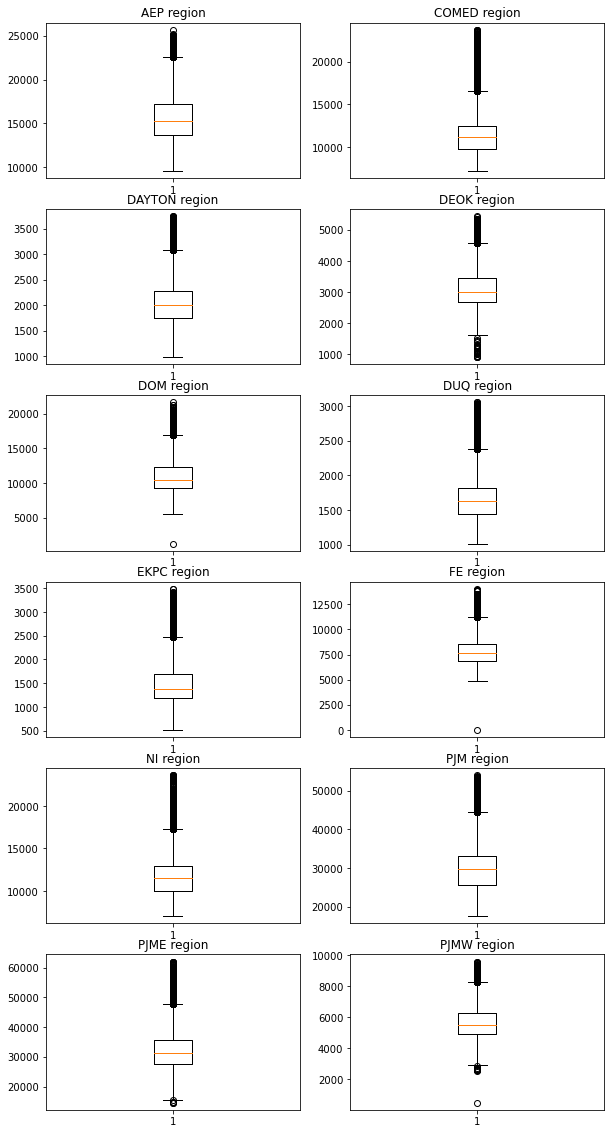

In [8]:
plt.figure(figsize=(10,20))
ax1 = plt.subplot(6, 2, 1);ax1.boxplot(aep['E_Consumption_MW']);ax1.title.set_text('AEP region')
ax2 = plt.subplot(6, 2, 2);ax2.boxplot(comed['E_Consumption_MW']);ax2.title.set_text('COMED region')
ax3 = plt.subplot(6, 2, 3);ax3.boxplot(dayton['E_Consumption_MW']);ax3.title.set_text('DAYTON region')
ax4 = plt.subplot(6, 2, 4);ax4.boxplot(deok['E_Consumption_MW']);ax4.title.set_text('DEOK region')
ax5 = plt.subplot(6, 2, 5);ax5.boxplot(dom['E_Consumption_MW']);ax5.title.set_text('DOM region')
ax6 = plt.subplot(6, 2, 6);ax6.boxplot(duq['E_Consumption_MW']);ax6.title.set_text('DUQ region')
ax7 = plt.subplot(6, 2, 7);ax7.boxplot(ekpc['E_Consumption_MW']);ax7.title.set_text('EKPC region')
ax8 = plt.subplot(6, 2, 8);ax8.boxplot(fe['E_Consumption_MW']);ax8.title.set_text('FE region')
ax9 = plt.subplot(6, 2, 9);ax9.boxplot(ni['E_Consumption_MW']);ax9.title.set_text('NI region')
ax10 = plt.subplot(6, 2, 10);ax10.boxplot(pjm['E_Consumption_MW']);ax10.title.set_text('PJM region')
ax11 = plt.subplot(6, 2, 11);ax11.boxplot(pjme['E_Consumption_MW']);ax11.title.set_text('PJME region')
ax12 = plt.subplot(6, 2, 12);ax12.boxplot(pjmw['E_Consumption_MW']);ax12.title.set_text('PJMW region')
plt.show()

In Regions **DOM, PJMW and FE** data show _Zero_ electric consumtion in just one hour, which is not logical, so that data should be removed.



In [58]:
remov1_inx = dom["E_Consumption_MW"].idxmin();dom = dom.drop(remov1_inx)
remov2_inx = fe["E_Consumption_MW"].idxmin();fe = fe.drop(remov2_inx)
remov3_inx = pjmw["E_Consumption_MW"].idxmin();pjmw = pjmw.drop(remov3_inx)

<AxesSubplot:>

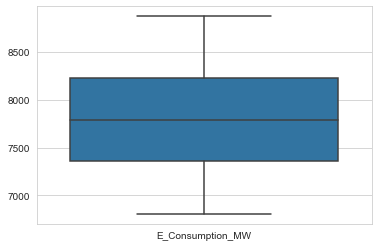

In [60]:
fe11 = fe[fe.E_Consumption_MW >= fe.E_Consumption_MW.quantile(.25) ]
fe11= fe11[fe11.E_Consumption_MW <= fe11.E_Consumption_MW.quantile(.75)]
sns.set_style("whitegrid")
sns.boxplot(data=fe11 )


In [61]:
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw] )
df_raw['Datetime'] = pd.to_datetime( df_raw['Datetime'] )
# print(df_raw.info(),'\n')
df_raw.sample(5) # check

,Datetime,E_Consumption_MW,Region
2409,2005-12-23 11:00:00,18156.0,AEP
24517,2014-10-16 18:00:00,7547.0,FE
110463,2017-05-25 10:00:00,1503.0,DUQ
119780,2015-05-02 21:00:00,26488.0,PJME
63246,2009-10-14 22:00:00,31361.0,PJME


In [62]:
df1 = df_raw.copy()
print(df1.columns,'\n')

print(df1.dtypes)

Index(['Datetime', 'E_Consumption_MW', 'Region'], dtype='object') 

Datetime            datetime64[ns]
E_Consumption_MW           float64
Region                      object
dtype: object


In [63]:
df1.isna().sum()

Datetime            0
E_Consumption_MW    0
Region              0
dtype: int64

In [64]:
num_attributes = df1.select_dtypes( include=['float64'] )
nNUM_attributes = df1.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

In [65]:
df1['Region'].unique()


array(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJM', 'PJME', 'PJMW'], dtype=object)

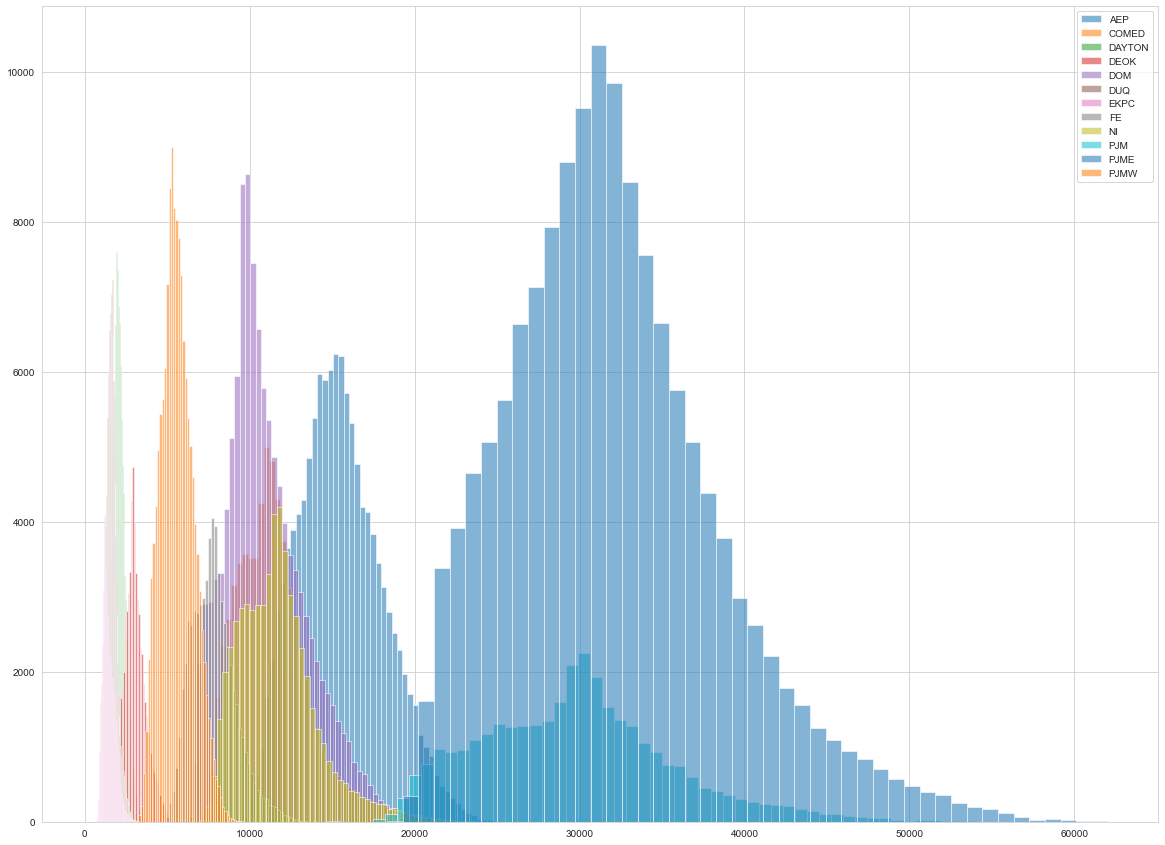

In [66]:
lab = df1['Region'].unique()
df1.groupby(['Region'])['E_Consumption_MW'].hist(bins=50, figsize=(20,15),alpha = 0.55)
plt.legend(lab)
plt.show()

<AxesSubplot:xlabel='E_Consumption_MW', ylabel='Density'>

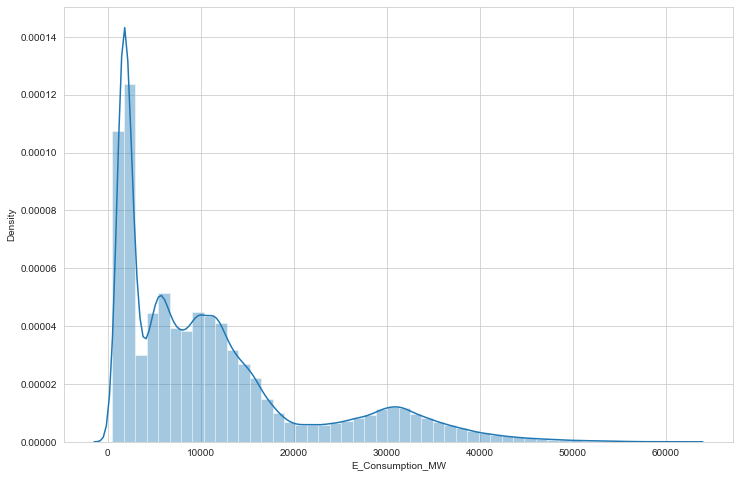

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot( df1['E_Consumption_MW'], hist=True )

### should we go to log dimension

#### error due to zero value 

In [68]:
# df_log = df1.copy()
# df_log['mw_energy_consumption'] = df_log.groupby('electric_company')['mw_energy_consumption'].transform(lambda x: np.log(x))
# plt.legend(lab)
# df_log.groupby(['electric_company'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55)

# plt.show()



### What is outlier:

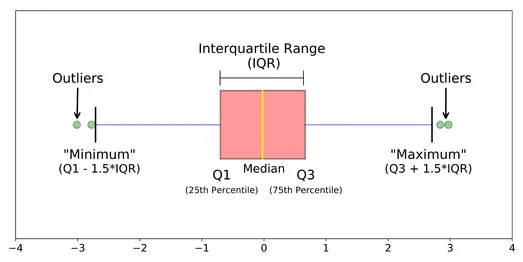

<AxesSubplot:xlabel='E_Consumption_MW', ylabel='Region'>

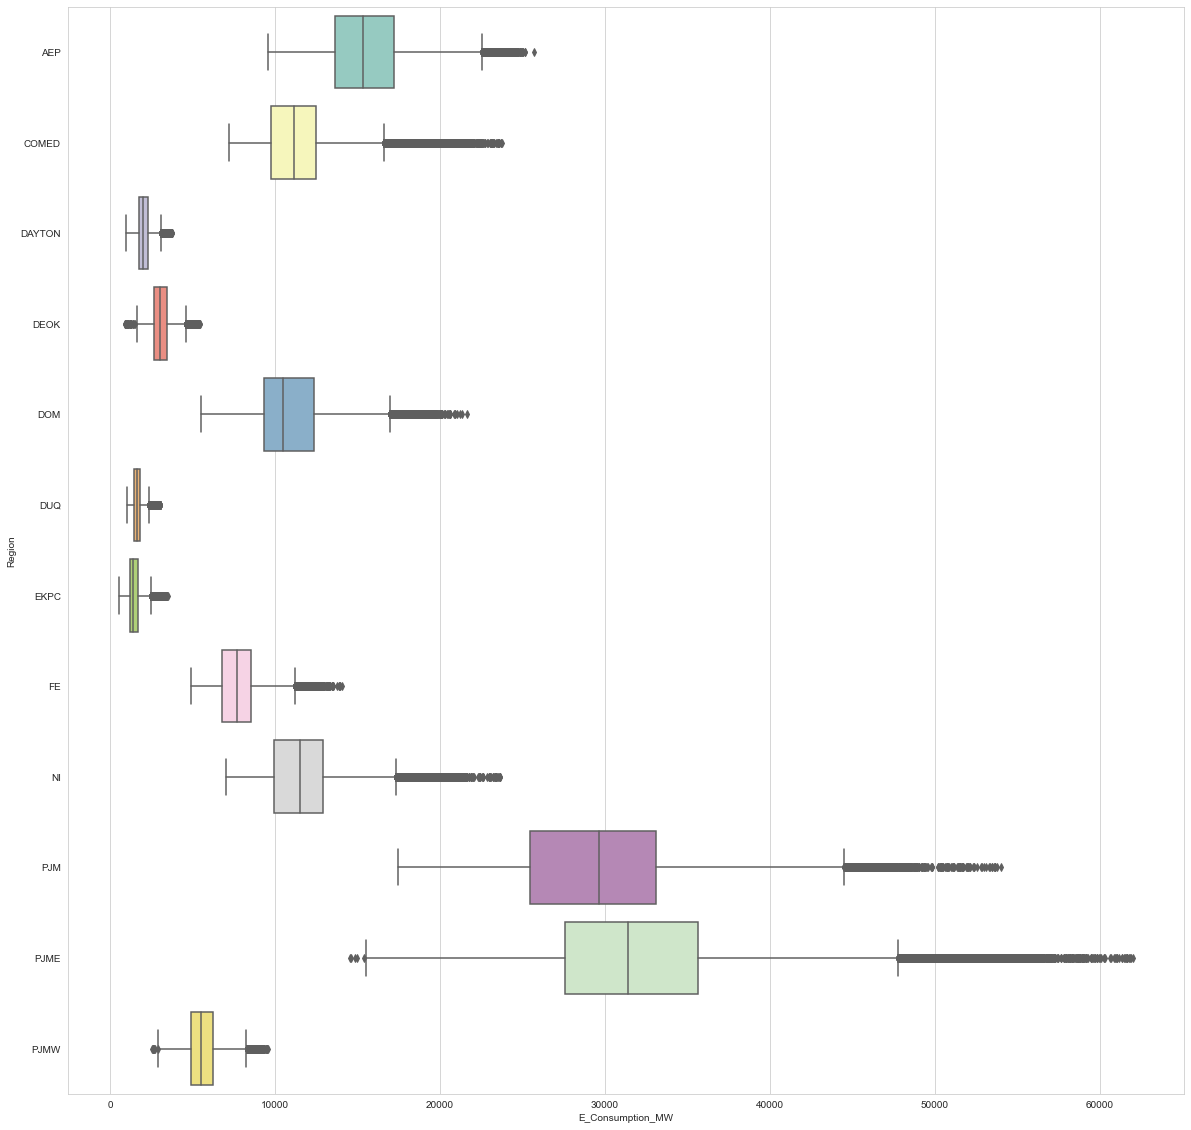

In [69]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot( y= 'Region', x='E_Consumption_MW' , data=df1 ,palette="Set3")

In [24]:
def data_prep(im_file):
         
#     print(im_file[im_file.duplicated(subset='Datetime',keep=False)])
    im_file.duplicated(subset='Datetime',keep=False).sum()
    im_file['Datetime']=pd.to_datetime(im_file['Datetime'])
    im_file['dow'] = im_file['Datetime'].dt.dayofweek
    im_file['month'] = im_file['Datetime'].dt.month
    im_file['Season'] = im_file['Datetime'].dt.quarter
    im_file['year'] = im_file['Datetime'].dt.year
    im_file['Day_session']=pd.cut(im_file.Datetime.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
    im_file['Workdays']=pd.cut(im_file.Datetime.dt.dayofweek,
               [0,4,6],
               labels=['workday','weekend'],
               include_lowest=True)
#     im_file['season'] = df2['Datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')
    im_file.tail(5)
    return im_file  


# 

In [25]:
df2 = df1.copy()
data_prep(df2).sample(15)
# # df2.sort_values('Datetime').groupby('electric_company').plot()


df2



,Datetime,E_Consumption_MW,Region,dow,month,Season,year,Day_session,Workdays
0,2004-12-31 01:00:00,13478.0,AEP,4,12,4,2004,Night,workday
1,2004-12-31 02:00:00,12865.0,AEP,4,12,4,2004,Night,workday
2,2004-12-31 03:00:00,12577.0,AEP,4,12,4,2004,Night,workday
3,2004-12-31 04:00:00,12517.0,AEP,4,12,4,2004,Night,workday
4,2004-12-31 05:00:00,12670.0,AEP,4,12,4,2004,Night,workday
...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW,0,1,1,2018,Evening,workday
143202,2018-01-01 21:00:00,8373.0,PJMW,0,1,1,2018,Evening,workday
143203,2018-01-01 22:00:00,8238.0,PJMW,0,1,1,2018,Evening,workday
143204,2018-01-01 23:00:00,7958.0,PJMW,0,1,1,2018,Evening,workday


In [26]:
df2_1 = df2.sort_values('Datetime',ascending=True).groupby('Region').head(len(df2))

In [27]:
df2_1 = df2_1.reset_index(drop=True)
df2_1

,Datetime,E_Consumption_MW,Region,dow,month,Season,year,Day_session,Workdays
0,1998-04-01 01:00:00,22259.0,PJM,2,4,2,1998,Night,workday
1,1998-04-01 02:00:00,21244.0,PJM,2,4,2,1998,Night,workday
2,1998-04-01 03:00:00,20651.0,PJM,2,4,2,1998,Night,workday
3,1998-04-01 04:00:00,20421.0,PJM,2,4,2,1998,Night,workday
4,1998-04-01 05:00:00,20713.0,PJM,2,4,2,1998,Night,workday
...,...,...,...,...,...,...,...,...,...
1090122,2018-08-03 00:00:00,5489.0,PJMW,4,8,3,2018,Night,workday
1090123,2018-08-03 00:00:00,1448.0,EKPC,4,8,3,2018,Night,workday
1090124,2018-08-03 00:00:00,2042.0,DAYTON,4,8,3,2018,Night,workday
1090125,2018-08-03 00:00:00,11385.0,DOM,4,8,3,2018,Night,workday


In [28]:
num_attributes2 = df2.select_dtypes( include=['int64', 'float64'] )
nNUM_attributes2 = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )


In [29]:
df3 = df2_1.copy()


df4 = df3.copy()


In [30]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.distplot( df2_1['E_Consumption_MW'], kde=False )

In [31]:
# num_attributes.hist( bins=25,figsize=(20,20) )



In [32]:
df4

,Datetime,E_Consumption_MW,Region,dow,month,Season,year,Day_session,Workdays
0,1998-04-01 01:00:00,22259.0,PJM,2,4,2,1998,Night,workday
1,1998-04-01 02:00:00,21244.0,PJM,2,4,2,1998,Night,workday
2,1998-04-01 03:00:00,20651.0,PJM,2,4,2,1998,Night,workday
3,1998-04-01 04:00:00,20421.0,PJM,2,4,2,1998,Night,workday
4,1998-04-01 05:00:00,20713.0,PJM,2,4,2,1998,Night,workday
...,...,...,...,...,...,...,...,...,...
1090122,2018-08-03 00:00:00,5489.0,PJMW,4,8,3,2018,Night,workday
1090123,2018-08-03 00:00:00,1448.0,EKPC,4,8,3,2018,Night,workday
1090124,2018-08-03 00:00:00,2042.0,DAYTON,4,8,3,2018,Night,workday
1090125,2018-08-03 00:00:00,11385.0,DOM,4,8,3,2018,Night,workday


In [33]:
df4['Region'].drop_duplicates()

0            PJM
32896       PJME
35056       PJMW
71576         NI
82590        AEP
82591     DAYTON
93629        DUQ
110904       DOM
458745     COMED
484107        FE
525188      DEOK
636836      EKPC
Name: Region, dtype: object

In [34]:


df4['Season'].drop_duplicates()


df4['Workdays'].drop_duplicates()




0     workday
71    weekend
Name: Workdays, dtype: category
Categories (2, object): ['workday' < 'weekend']

<AxesSubplot:xlabel='E_Consumption_MW', ylabel='Density'>

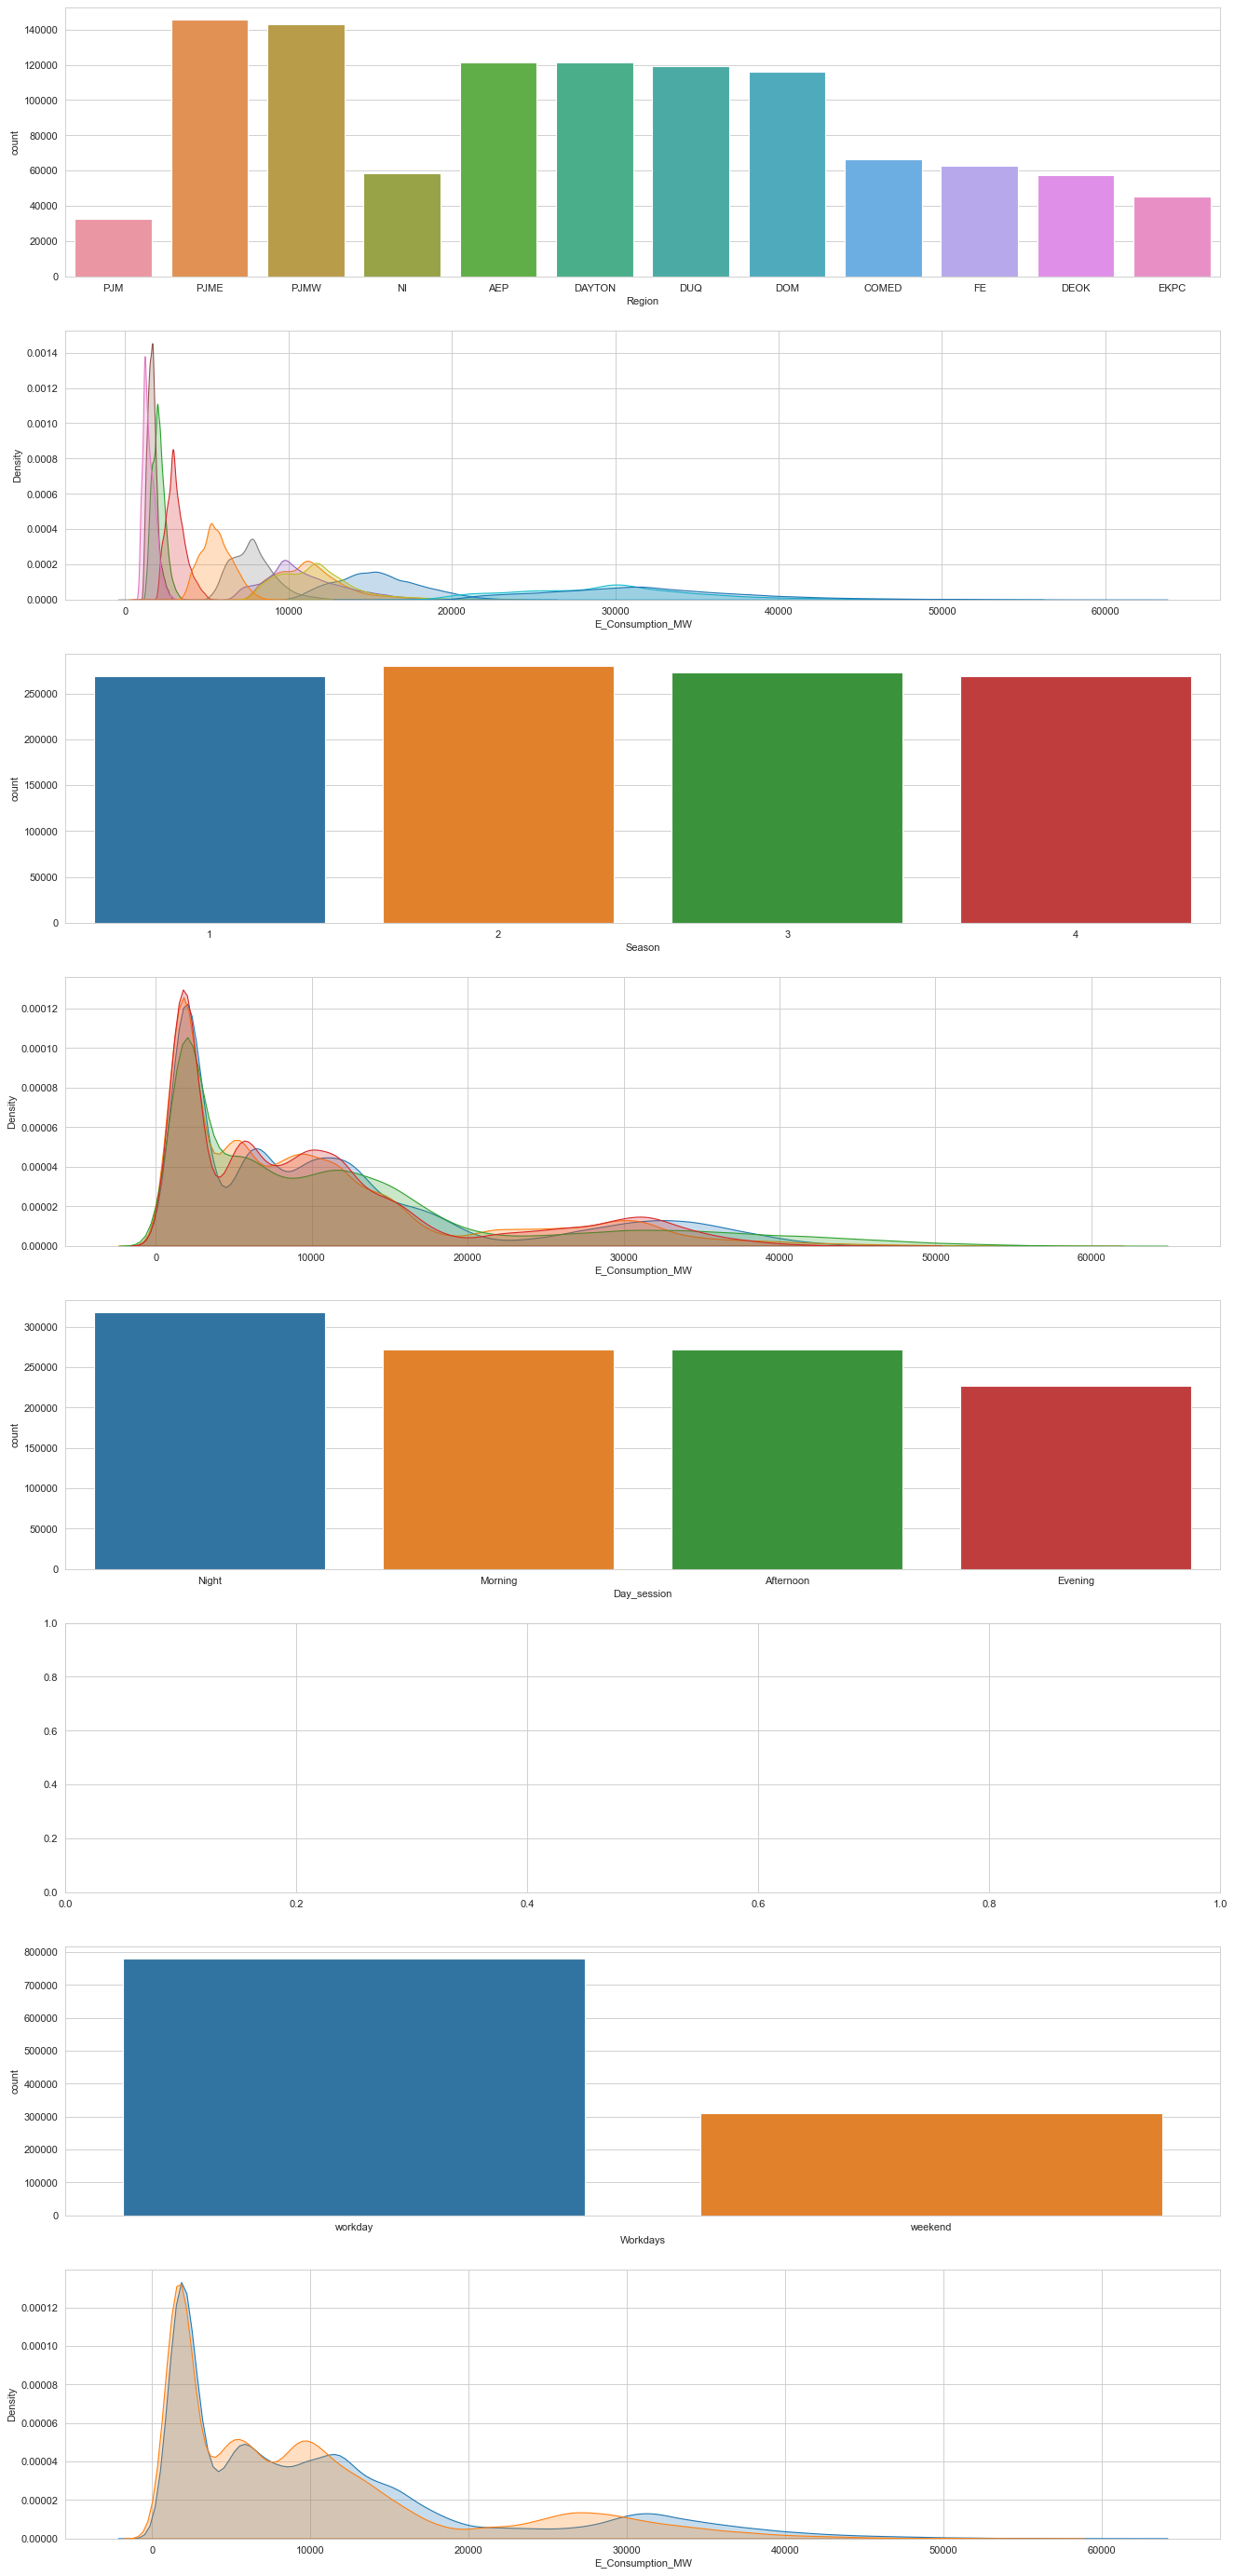

In [36]:
plt.figure(figsize=(20, 45), dpi=80)
plt.subplot( 8, 1, 1)
sns.countplot( df4['Region'] )

plt.subplot( 8, 1, 2)
sns.kdeplot( df4[df4['Region'] == 'AEP']['E_Consumption_MW'], label='AEP', shade=True )
sns.kdeplot( df4[df4['Region'] == 'COMED']['E_Consumption_MW'], label='COMED', shade=True )
sns.kdeplot( df4[df4['Region'] == 'DAYTON']['E_Consumption_MW'], label='DAYTON', shade=True )
sns.kdeplot( df4[df4['Region'] == 'DEOK']['E_Consumption_MW'], label='DEOK', shade=True )
sns.kdeplot( df4[df4['Region'] == 'DOM']['E_Consumption_MW'], label='DOM', shade=True )
sns.kdeplot( df4[df4['Region'] == 'DUQ']['E_Consumption_MW'], label='DUQ', shade=True )
sns.kdeplot( df4[df4['Region'] == 'EKPC']['E_Consumption_MW'], label='EKPC', shade=True )
sns.kdeplot( df4[df4['Region'] == 'FE']['E_Consumption_MW'], label='FE', shade=True )
sns.kdeplot( df4[df4['Region'] == 'NI']['E_Consumption_MW'], label='NI', shade=True )
sns.kdeplot( df4[df4['Region'] == 'PJM']['E_Consumption_MW'], label='PJM', shade=True )
sns.kdeplot( df4[df4['Region'] == 'PJME']['E_Consumption_MW'], label='PJME', shade=True )
sns.kdeplot( df4[df4['Region'] == 'PJMW']['E_Consumption_MW'], label='PJMW', shade=True )

# # season

plt.subplot( 8, 1, 3)
sns.countplot( df4['Season'] )

plt.subplot( 8, 1, 4)
sns.kdeplot( df4[df4['Season'] == 1]['E_Consumption_MW'], label='Winter', shade=True )
sns.kdeplot( df4[df4['Season'] == 2]['E_Consumption_MW'], label='Autumn', shade=True )
sns.kdeplot( df4[df4['Season'] == 3]['E_Consumption_MW'], label='Summer', shade=True )
sns.kdeplot( df4[df4['Season'] == 4]['E_Consumption_MW'], label='Spring', shade=True )


# # Daytime

plt.subplot( 8, 1, 5)
sns.countplot( df4['Day_session'] )


plt.subplot( 8, 1, 6)
sns.kdeplot( df4[df4['Day_session'] == 1]['E_Consumption_MW'], label='Night', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 2]['E_Consumption_MW'], label='Morning', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 3]['E_Consumption_MW'], label='Noon', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 4]['E_Consumption_MW'], label='Evening', shade=True )




# # # holidays

plt.subplot( 8, 1, 7)
sns.countplot( df4['Workdays'] )

plt.subplot( 8, 1, 8)
sns.kdeplot( df4[df4['Workdays'] == 'workday']['E_Consumption_MW'], label='Holiday', shade=True )
sns.kdeplot( df4[df4['Workdays'] == 'weekend']['E_Consumption_MW'], label='Normal day', shade=True )


# ### add our parts

In [ ]:
# com_num = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
# df4['Region'] = df4['E_Consumption_MW'].map( com_num );
# wed_num= { 'weekend': 1, 'Workday': 2}
# df4['Workdays']= df4['Workdays'].map( wed_num );

ValueError: Could not interpret input 'Region'

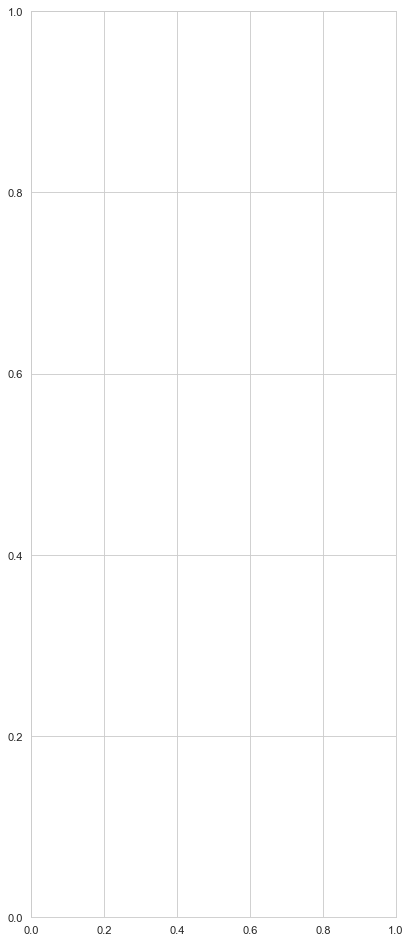

In [37]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['Region', 'E_Consumption_MW']].groupby( 'E_Consumption_MW' ).mean().reset_index()

sns.barplot( x='Region', y='E_Consumption_MW', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['Region', 'E_Consumption_MW']].groupby( 'Region' ).mean().reset_index()
sns.regplot( x='Region', y='E_Consumption_MW', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['Region', 'E_Consumption_MW']].groupby( 'Region' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

In [ ]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()

sns.barplot( x='year', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()
sns.regplot( x='year', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

In [ ]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()

sns.barplot( x='Season', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.regplot( x='Season', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

In [ ]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()

sns.barplot( x='dow', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()
sns.regplot( x='dow', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

In [ ]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['workdays', 'mw_energy_consumption']].groupby( 'workdays' ).mean().reset_index()

sns.barplot( x='workdays', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['workdays', 'mw_energy_consumption']].groupby( 'workdays' ).mean().reset_index()
sns.regplot( x='workdays', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['workdays', 'mw_energy_consumption']].groupby( 'workdays' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

In [ ]:
# aux1 = df4[['weekdays', 'mw_energy_consumption']].groupby( 'weekdays' ).sum().reset_index()
# plt.subplot( 2, 1, 1 )
# sns.barplot( x='weekdays', y='mw_energy_consumption', data=aux1 )

# aux2 = df4[['year', 'weekdays', 'mw_energy_consumption']].groupby( ['year', 'weekdays'] ).sum().reset_index()
# plt.subplot( 2, 1, 2 )
# sns.barplot( x='year', y='mw_energy_consumption', hue='weekdays', data=aux2 );

In [ ]:
correlation = num_attributes2.corr( method='pearson' )
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap( correlation, annot=True )

In [ ]:
df4

In [ ]:
ins = df4.loc[df4['electric_company'] == 10]
ins = np.asarray(ins).reshape(-1,1)
ins

In [ ]:
ins

In [45]:
for col in ['E_Consumption_MW' ,'Region' , 'dow' ,'Season' ,'Day_session' ,'Workdays']:
    df4[col] = df4[col].astype('category')

In [46]:
df4

,Datetime,E_Consumption_MW,Region,dow,month,Season,year,Day_session,Workdays
0,1998-04-01 01:00:00,22259.0,PJM,2,4,2,1998,Night,workday
1,1998-04-01 02:00:00,21244.0,PJM,2,4,2,1998,Night,workday
2,1998-04-01 03:00:00,20651.0,PJM,2,4,2,1998,Night,workday
3,1998-04-01 04:00:00,20421.0,PJM,2,4,2,1998,Night,workday
4,1998-04-01 05:00:00,20713.0,PJM,2,4,2,1998,Night,workday
...,...,...,...,...,...,...,...,...,...
1090122,2018-08-03 00:00:00,5489.0,PJMW,4,8,3,2018,Night,workday
1090123,2018-08-03 00:00:00,1448.0,EKPC,4,8,3,2018,Night,workday
1090124,2018-08-03 00:00:00,2042.0,DAYTON,4,8,3,2018,Night,workday
1090125,2018-08-03 00:00:00,11385.0,DOM,4,8,3,2018,Night,workday


In [77]:
df_dumm = pd.get_dummies(df4, columns =['Region', 'dow','Season','Day_session','Workdays'])


In [78]:
df_dumm

,Datetime,E_Consumption_MW,month,year,Region_AEP,Region_COMED,Region_DAYTON,Region_DEOK,Region_DOM,Region_DUQ,...,Season_1,Season_2,Season_3,Season_4,Day_session_Night,Day_session_Morning,Day_session_Afternoon,Day_session_Evening,Workdays_workday,Workdays_weekend
0,1998-04-01 01:00:00,22259.0,4,1998,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1998-04-01 02:00:00,21244.0,4,1998,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1998-04-01 03:00:00,20651.0,4,1998,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,1998-04-01 04:00:00,20421.0,4,1998,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1998-04-01 05:00:00,20713.0,4,1998,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090122,2018-08-03 00:00:00,5489.0,8,2018,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1090123,2018-08-03 00:00:00,1448.0,8,2018,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1090124,2018-08-03 00:00:00,2042.0,8,2018,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1090125,2018-08-03 00:00:00,11385.0,8,2018,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [39]:
def split_to_train_test(df, label_column, frac=0.5):
 
    train_df, test_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
#     print(labels)
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        
        lbl_train_df = lbl_df.sample(frac=frac)
#         print(lbl_train_df)
        lbl_test_df = lbl_df.drop(lbl_train_df.index)
#         print(lbl_test_df)
        y_train=pd.DataFrame(lbl_train_df['E_Consumption_MW'])
        y_test=pd.DataFrame(lbl_test_df['E_Consumption_MW'])
        print('\n%s:\n---------\ntotal:%d\ntrain_df:%d\ntest_df:%d\ny_train:%d\ny_test:%d' % (lbl, len(lbl_df), len(lbl_train_df), len(lbl_test_df),len(y_train),len(y_test)))
        train_df = train_df.append(lbl_train_df)
        test_df = test_df.append(lbl_test_df)

    return train_df, test_df#,y_train,y_test

In [40]:
X_train,X_test  = split_to_train_test(df_dumm, 'dow', frac=0.5)


2:
---------
total:155830
train_df:77915
test_df:77915
y_train:77915
y_test:77915

3:
---------
total:155831
train_df:77916
test_df:77915
y_train:77916
y_test:77915

4:
---------
total:155641
train_df:77820
test_df:77821
y_train:77820
y_test:77821

5:
---------
total:155709
train_df:77854
test_df:77855
y_train:77854
y_test:77855

6:
---------
total:155550
train_df:77775
test_df:77775
y_train:77775
y_test:77775

0:
---------
total:155783
train_df:77892
test_df:77891
y_train:77892
y_test:77891

1:
---------
total:155783
train_df:77892
test_df:77891
y_train:77892
y_test:77891


In [42]:
Y_train = X_train['E_Consumption_MW']
Y_test = X_test['E_Consumption_MW']

In [ ]:
Y_test

In [ ]:
# For the algorithm understand the variable "electric company" we have to transform from string to number.
# assortment_dict = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
# X_train['electric_company'] = X_train['electric_company'].map( assortment_dict )
# X_test['electric_company'] = X_test['electric_company'].map( assortment_dict );
X_test

In [43]:
X_train_1 = X_train.loc[X_train['Region']==1].drop(['Datetime'],axis = 1)
y_train = X_train_1['E_Consumption_MW']

In [44]:
X_test

,Datetime,E_Consumption_MW,Region,dow,month,Season,year,Day_session,Workdays
0,1998-04-01 01:00:00,22259.0,PJM,2,4,2,1998,Night,workday
1,1998-04-01 02:00:00,21244.0,PJM,2,4,2,1998,Night,workday
4,1998-04-01 05:00:00,20713.0,PJM,2,4,2,1998,Night,workday
7,1998-04-01 08:00:00,28724.0,PJM,2,4,2,1998,Morning,workday
12,1998-04-01 13:00:00,31227.0,PJM,2,4,2,1998,Afternoon,workday
...,...,...,...,...,...,...,...,...,...
1089624,2018-07-31 22:00:00,13766.0,DOM,1,7,3,2018,Evening,workday
1089625,2018-07-31 22:00:00,8785.0,FE,1,7,3,2018,Evening,workday
1089629,2018-07-31 23:00:00,15504.0,AEP,1,7,3,2018,Evening,workday
1089634,2018-07-31 23:00:00,1614.0,EKPC,1,7,3,2018,Evening,workday


In [ ]:
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

In [ ]:
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(X_train_1, y_train)

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_1, y_train)


In [ ]:
pred = regr.predict(X_train_1)

In [ ]:
regr.score(X_train_1,y_train)


In [ ]:
regr.score(X_test.drop(['Datetime'],axis = 1),Y_test)

In [ ]:
pd.get_dummies(df1['electric_company'])